# Feature analysis
Notebook contains analysis of the features which have been extracted from each segment from the original signal. According to a paper I removed segments which contains quakes. Those segment's statistics are different that other segment and could causes spoil prediction. Based on those features CatBoost scored oof = 2.017, and LB kaggle score = 1.451.  

In [2]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [17]:
#Loading features
features = pd.read_csv(os.path.join("../extracted_feat","train_11.csv"))
features.columns.values

array(['seg_25_quantile', 'seg_75_quantile', 'seg_1_quantile',
       'seg_99_quantile', 'seg_10_quantile', 'seg_90_quantile', 'seg_iqr',
       'seg_mean', 'seg_var', 'seg_min', 'seg_max', 'seg_kurt',
       'seg_skew', 'butter_mean', 'butter_var', 'butter_min',
       'butter_max', '3_part_mean', '3_part_var', '3_part_min',
       '3_part_max', '3_part_kurt', '3_part_skew', '2_part_mean',
       '2_part_var', '2_part_min', '2_part_max', '2_part_kurt',
       '2_part_skew', '1_part_mean', '1_part_var', '1_part_min',
       '1_part_max', '1_part_kurt', '1_part_skew', '3_part_25_quantile',
       '3_part_75_quantile', '3_part_1_quantile', '3_part_99_quantile',
       '3_part_10_quantile', '3_part_90_quantile', '3_part_iqr',
       '2_part_25_quantile', '2_part_75_quantile', '2_part_1_quantile',
       '2_part_99_quantile', '2_part_10_quantile', '2_part_90_quantile',
       '2_part_iqr', '1_part_25_quantile', '1_part_75_quantile',
       '1_part_1_quantile', '1_part_99_quantile', '1_part

In [5]:
#loading targets values
true_out  = pd.read_csv(os.path.join("../extracted_feat","train_y_73.csv"))

In [20]:
#eliminate quakes from training
quakes = (true_out["time_to_failure"] - true_out["time_to_failure"].shift())>0.5
        
features_eliminated = features[~quakes].copy()
true_out_eliminated = true_out[~quakes].copy()

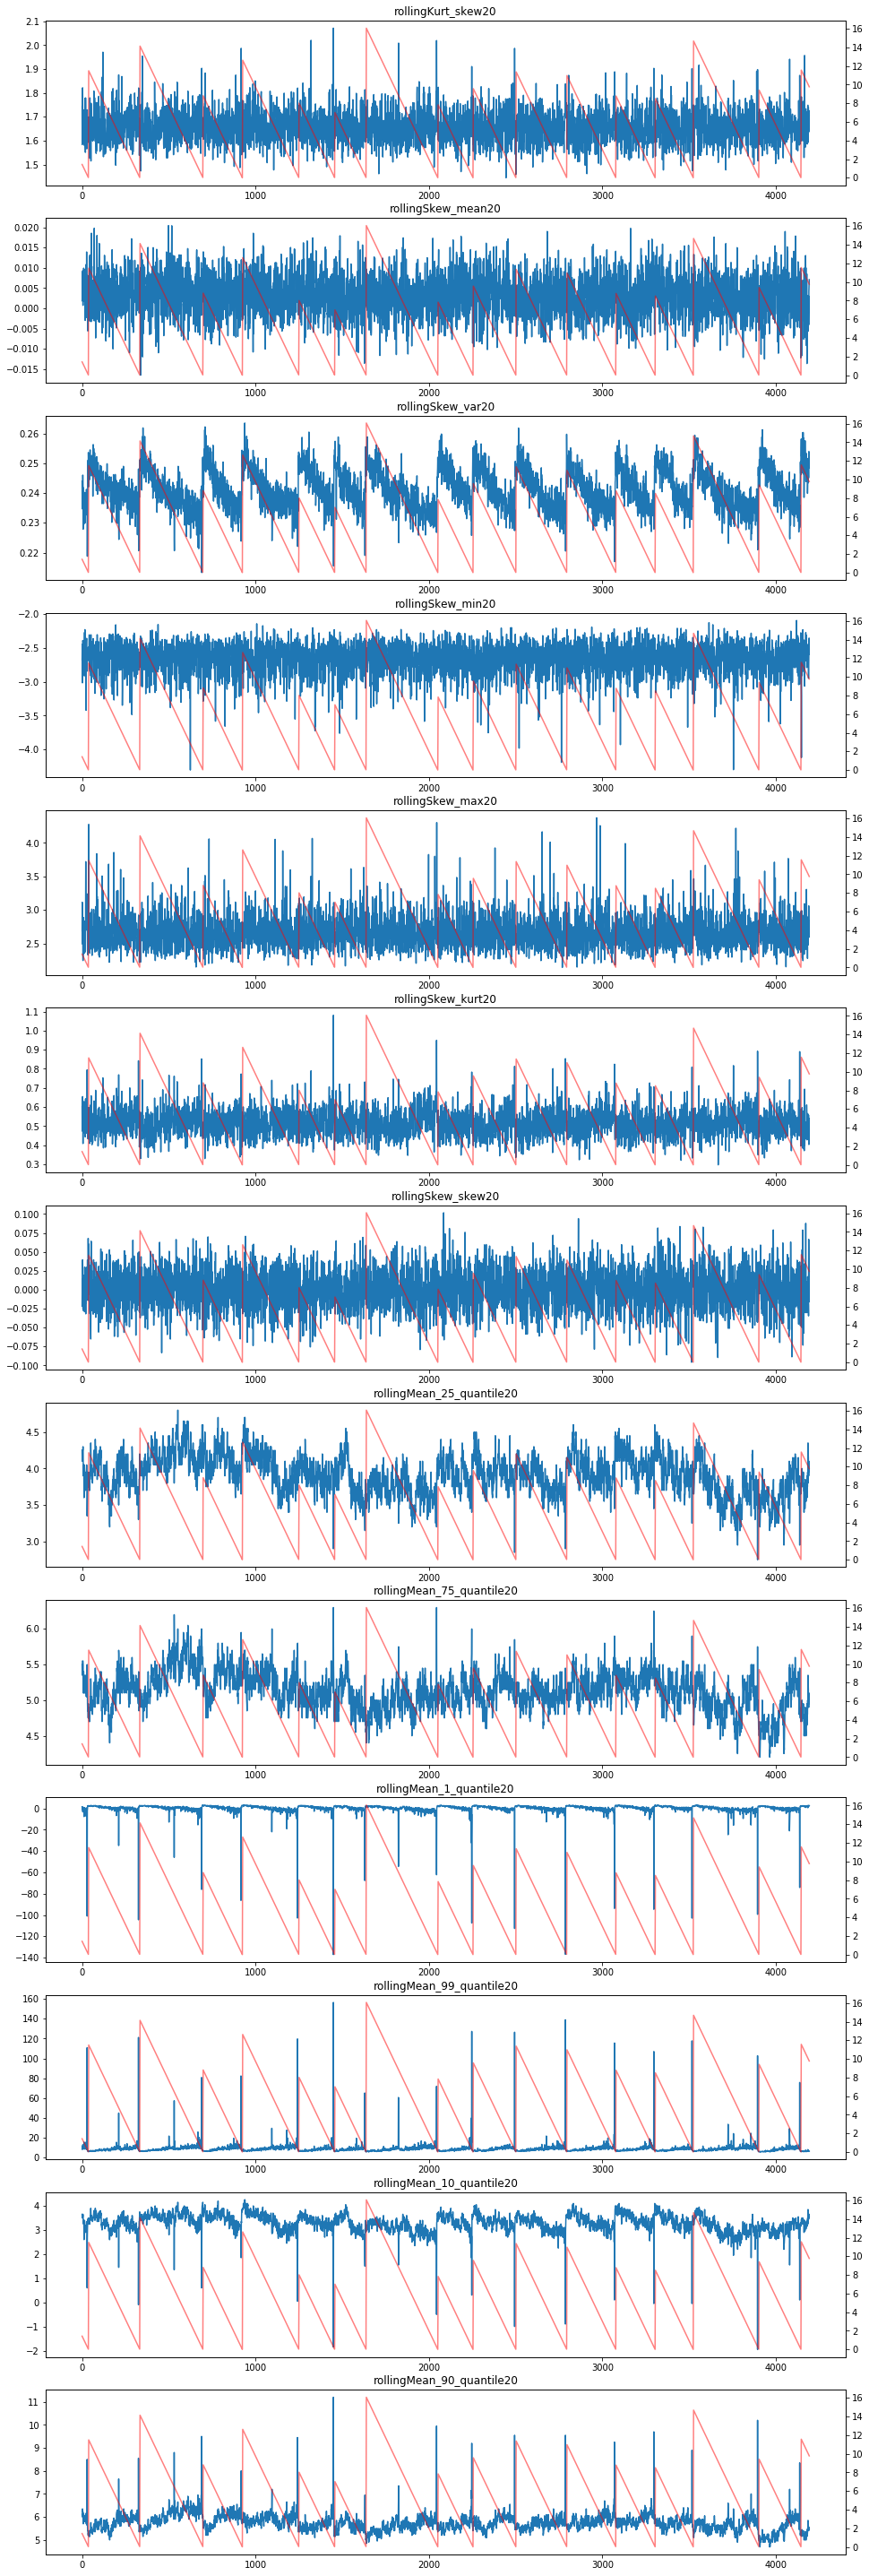

In [23]:
#extracted features of each segment
def plot_features(true_out,features,features_names):
    nr_features = len(features_names)
    figure_width = 4*nr_features
    fig,ax = plt.subplots(nr_features,1,figsize=(16,figure_width))
    for it,feat in enumerate(features_names):
        ax[it].plot(features[feat])
        ax[it].set_title(feat)
        
        ax2 = ax[it].twinx()
        ax2.plot(true_out["time_to_failure"],color="red",alpha=0.5)

features_names = [ 'rollingKurt_skew20', 'rollingSkew_mean20',
       'rollingSkew_var20', 'rollingSkew_min20', 'rollingSkew_max20',
       'rollingSkew_kurt20', 'rollingSkew_skew20',
       'rollingMean_25_quantile20', 'rollingMean_75_quantile20',
       'rollingMean_1_quantile20', 'rollingMean_99_quantile20',
       'rollingMean_10_quantile20', 'rollingMean_90_quantile20',]
plot_features(true_out_eliminated,features_eliminated,features_names)

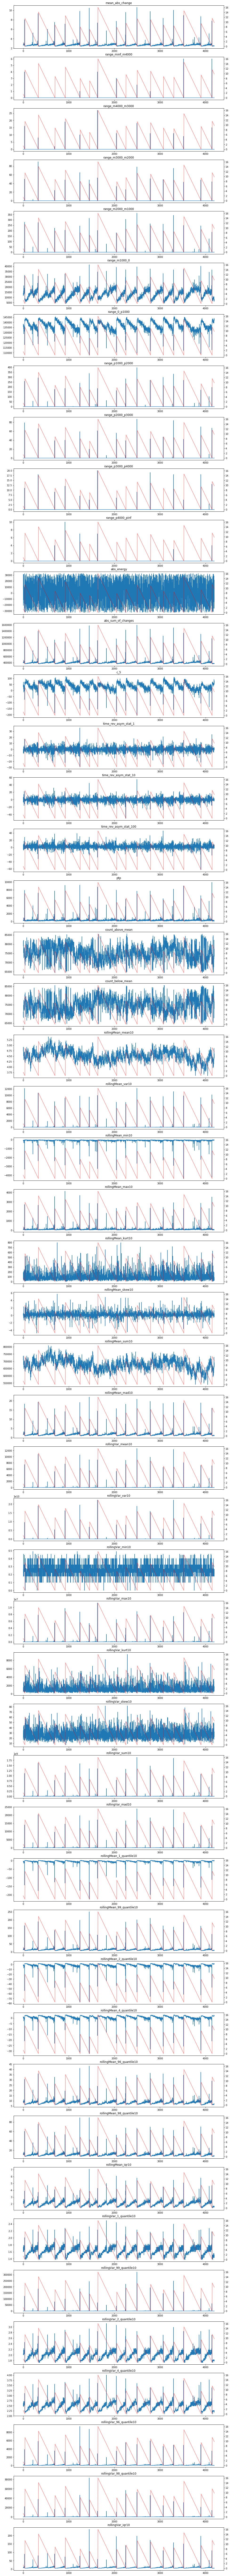

In [9]:
features_names_2 = [ 'mean_abs_change', 'range_minf_m4000',
       'range_m4000_m3000', 'range_m3000_m2000', 'range_m2000_m1000',
       'range_m1000_0', 'range_0_p1000', 'range_p1000_p2000',
       'range_p2000_p3000', 'range_p3000_p4000', 'range_p4000_pinf',
       'abs_energy', 'abs_sum_of_changes', 'c_5', 'time_rev_asym_stat_1',
       'time_rev_asym_stat_10', 'time_rev_asym_stat_100', 'ptp',
       'count_above_mean', 'count_below_mean', 'rollingMean_mean10',
       'rollingMean_var10', 'rollingMean_min10', 'rollingMean_max10',
       'rollingMean_kurt10', 'rollingMean_skew10', 'rollingMean_sum10',
       'rollingMean_mad10', 'rollingVar_mean10', 'rollingVar_var10',
       'rollingVar_min10', 'rollingVar_max10', 'rollingVar_kurt10',
       'rollingVar_skew10', 'rollingVar_sum10', 'rollingVar_mad10',
       'rollingMean_1_quantile10', 'rollingMean_99_quantile10',
       'rollingMean_2_quantile10', 'rollingMean_4_quantile10',
       'rollingMean_96_quantile10', 'rollingMean_98_quantile10',
       'rollingMean_iqr10', 'rollingVar_1_quantile10',
       'rollingVar_99_quantile10', 'rollingVar_2_quantile10',
       'rollingVar_4_quantile10', 'rollingVar_96_quantile10',
       'rollingVar_98_quantile10', 'rollingVar_iqr10'
                ]
plot_features(true_out_eliminated,features_eliminated,features_names_2)

It is visible peaks in many features. They mostly, but not always exists just before quake. 
Some features:
- have very similiar shapes,
- looks like noise and looks totally not correlated to the time_to_failure
- doesn't contain any information - like moment_1

Let's look closer what is happening in the part of the segments features.

In [22]:
features_eliminated.corrwith(true_out_eliminated.time_to_failure).sort_values()

rollingKurt_1_quantile20      -0.640141
rollingVar_1_quantile20       -0.640141
rollingKurt_10_quantile20     -0.632996
rollingVar_10_quantile20      -0.632996
rollingKurt_1_quantile200     -0.631673
rollingVar_1_quantile200      -0.631673
rollingVar_10_quantile200     -0.620353
rollingKurt_10_quantile200    -0.620353
rollingKurt_mean1000          -0.603756
rollingVar_25_quantile20      -0.596591
rollingKurt_25_quantile20     -0.596591
rollingVar_1_quantile1000     -0.590152
rollingKurt_1_quantile1000    -0.590152
rollingKurt_10_quantile1000   -0.577821
rollingVar_10_quantile1000    -0.577821
rollingMean_iqr20             -0.573864
rollingKurt_25_quantile200    -0.549458
rollingVar_25_quantile200     -0.549458
rollingSkew_var200            -0.544263
rollingVar_min1000            -0.537872
rollingKurt_25_quantile1000   -0.520103
rollingVar_25_quantile1000    -0.520103
rollingKurt_var200            -0.504581
seg_iqr                       -0.504570
seg_90_quantile               -0.466303


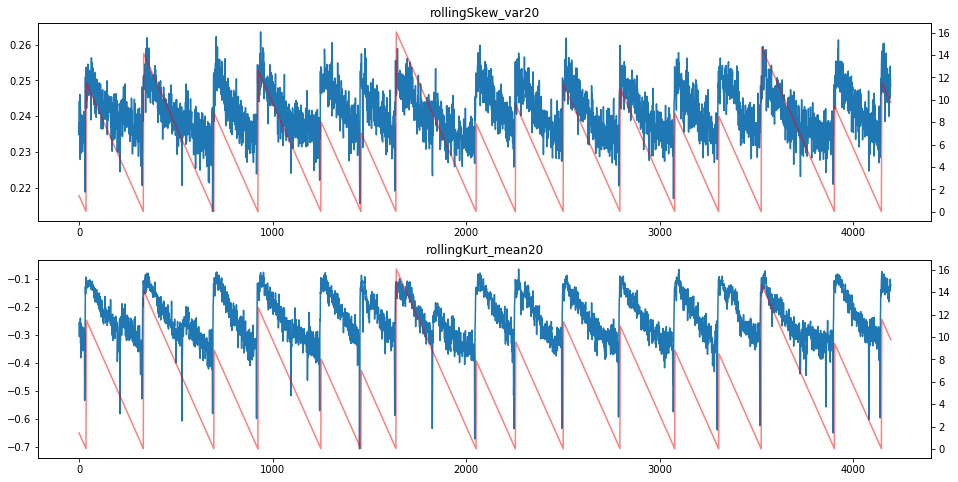

In [27]:
plot_features(true_out_eliminated,features_eliminated,["rollingSkew_var20","rollingKurt_mean20"])

In [30]:
features_eliminated[["rollingSkew_var20","rollingKurt_mean20"]]

,rollingSkew_var20,rollingKurt_mean20
0,0.244014,-0.256765
1,0.234708,-0.276527
2,0.238178,-0.306390
3,0.236364,-0.284059
4,0.246066,-0.267396
5,0.241186,-0.269642
6,0.227887,-0.296258
7,0.241842,-0.240351
8,0.232849,-0.329756
9,0.233501,-0.304134


In [32]:
features_eliminated[["rollingSkew_var20","rollingKurt_mean20"]]

,rollingSkew_var20,rollingKurt_mean20
0,0.244014,-0.256765
1,0.234708,-0.276527
2,0.238178,-0.306390
3,0.236364,-0.284059
4,0.246066,-0.267396
5,0.241186,-0.269642
6,0.227887,-0.296258
7,0.241842,-0.240351
8,0.232849,-0.329756
9,0.233501,-0.304134
